In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string as str
import numpy as np

In [103]:
df = pd.read_csv('fake_job_postings.csv')

In [66]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1457,1458,INVESTMENT SPECIALIST,"PH, 00, Makati City",Cocolife Asset Management,NaN,NaN,Investment SpecialistCOCOLIFE ASSET MANAGEMENT...,18-60 years old•At least High School graduate ...,NaN,0,0,0,Full-time,Not Applicable,High School or equivalent,Financial Services,Sales,0
15277,15278,Handyman & Independent Contractors (Home Pros),"US, GA, Atlanta",NaN,NaN,Hedge your bets - work with the best domestic ...,"Have skills in Plumbing, Furniture Assembly, P...",Requirements:* Must have own tools and reliabl...,Pay is $16/hr (add tips and you make even more...,0,1,1,Other,Not Applicable,NaN,NaN,NaN,0
17068,17069,Peoplesoft HCM Functional Lead,"US, PA, Harrisburg",NaN,NaN,NaN,Position Title: PeopleSoft HCM Functional Lead...,Skill Matrix:SkillRequired / DesiredAmountof E...,NaN,0,0,0,Contract,Mid-Senior level,NaN,Information Technology and Services,Information Technology,0
6605,6606,Events & Sponsorship Manager,"NZ, N, Auckland",Marketing,NaN,Vend is looking for some awesome new talent to...,Events with Vend mean getting out there and am...,Experience managing calendars of international...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Associate,NaN,Computer Software,Marketing,0
13089,13090,Fisheries Observer,"US, FL, Panama City",NaN,NaN,Riverside is an internationally recognized eng...,"COMPANY DESCRIPTIONRiverside Technology, inc. ...",Essential: Education and experience in marine ...,Pelagic Observer Program Location: NOAA Fisher...,1,1,1,NaN,NaN,NaN,Fishery,Science,0


In [67]:
df.shape

(17880, 18)

TypeError: Cannot interpret '<module 'string' from 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\string.py'>' as a data type

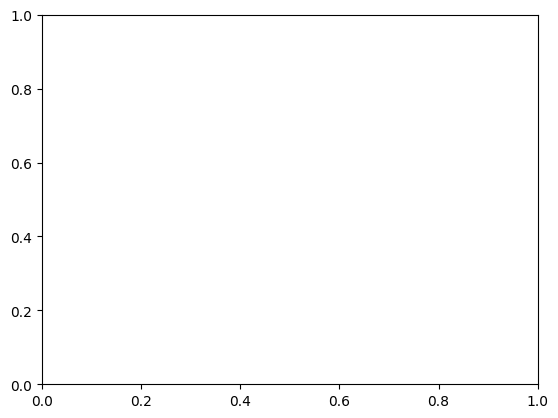

In [68]:
data_distribution = df['fraudulent'].value_counts()
fig, ax = plt.subplots()
ax.bar(data_distribution.index.astype(str), data_distribution.values)
plt.show(fig)

<Axes: >

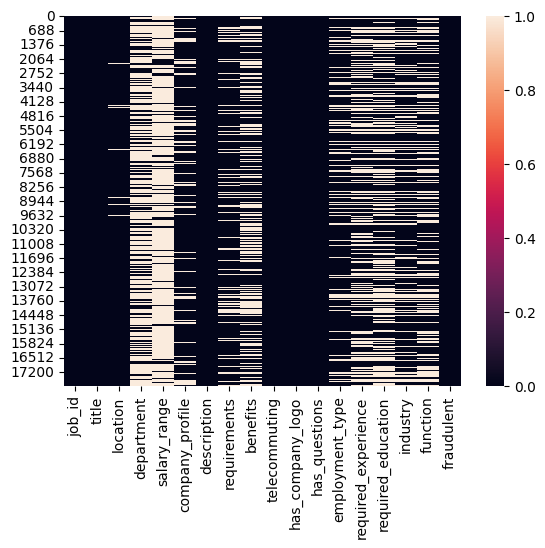

In [70]:
sns.heatmap(df.isnull())

<Axes: >

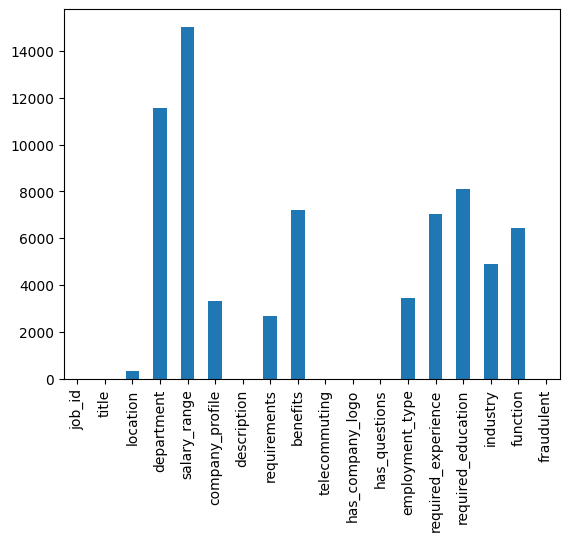

In [71]:
df.isna().sum().plot(kind='bar')

In [105]:
df = df.dropna(subset=['location'])
df.shape

(17534, 18)

In [106]:
df['location'] = df['location'].apply(lambda x: x.split(','))
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"[US, NY, New York]",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"[NZ, , Auckland]",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"[US, IA, Wever]",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"[US, DC, Washington]",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"[US, FL, Fort Worth]",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [109]:
df['country'] = df['location'].apply(lambda x: x[0] if len(x)>0 else np.nan)
df['state'] = df['location'].apply(lambda x: x[1] if len(x)>1 else np.nan)
df['city'] = df['location'].apply(lambda x: x[2] if len(x)>2 else np.nan)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,1,Marketing Intern,"[US, NY, New York]",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,2,Customer Service - Cloud Video Production,"[NZ, , Auckland]",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,3,Commissioning Machinery Assistant (CMA),"[US, IA, Wever]",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,4,Account Executive - Washington DC,"[US, DC, Washington]",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,5,Bill Review Manager,"[US, FL, Fort Worth]",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth
